In [1]:
%matplotlib inline
import xarray as xr
import os
import numpy as np
import matplotlib.pyplot as plt
import collections

import cartopy
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature, RIVERS

In [2]:
domain = xr.open_dataset(os.path.join('/u/home/gergel/data/parameters', 
                                      'domain.lnd.wr50a_ar9v4.100920.nc'))

In [3]:
tbot_hist_dir = '/p/cwfs/gergel/low_warming_ensemble/arctic/historical/TBOT'
tbot_hist_file = xr.open_mfdataset(os.path.join(tbot_hist_dir, 'TBOT*_wr50a_ar9v4.nc'),
                                  concat_dim='ensemble_member')
tbot_hist = tbot_hist_file['TBOT'].sel(time=slice('1976-09-01', '2005-08-31'))

dir = '/p/cwfs/gergel/low_warming_ensemble/arctic'
tbot_1pt5_file = xr.open_mfdataset(os.path.join(dir, 'TBOT', 'TBOT.1pt5degC.*_wr50a_ar9v4.nc'),
                                  concat_dim='ensemble_member')
tbot_1pt5 = tbot_1pt5_file['TBOT'].sel(time=slice('2070-09-01', '2099-08-31'))

tbot_2pt0_file = xr.open_mfdataset(os.path.join(dir, 'TBOT', 'TBOT.2pt0degC.*_wr50a_ar9v4.nc'),
                                  concat_dim='ensemble_member')
tbot_2pt0 = tbot_2pt0_file['TBOT'].sel(time=slice('2070-09-01', '2099-08-31'))

In [4]:
runoff_hist_file = xr.open_mfdataset(os.path.join('/p/cwfs/gergel/low_warming_ensemble/arctic/historical/QRUNOFF', 
                                             'QRUNOFF*'), 
                                concat_dim='ensemble_member')
qrunoff_hist = runoff_hist_file['QRUNOFF'].sel(time=slice('1976-09-01', '2005-08-31'))
runoff_1pt5_file = xr.open_mfdataset(os.path.join('/p/cwfs/gergel/low_warming_ensemble/arctic/QRUNOFF', 
                                             'QRUNOFF.1pt5degC.*'), 
                                concat_dim='ensemble_member')
qrunoff_1pt5 = runoff_1pt5_file['QRUNOFF'].sel(time=slice('2070-09-01', '2099-08-31'))
runoff_2pt0_file = xr.open_mfdataset(os.path.join('/p/cwfs/gergel/low_warming_ensemble/arctic/QRUNOFF', 
                                             'QRUNOFF.2pt0degC.*'), 
                                concat_dim='ensemble_member')
qrunoff_2pt0 = runoff_2pt0_file['QRUNOFF'].sel(time=slice('2070-09-01', '2099-08-31'))

In [5]:
# historical
runoff_hist = qrunoff_hist.groupby('time.season').mean('time')
runoff_hist_annual = qrunoff_hist.groupby('time.year').sum('time').mean('year')

# 1pt5
runoff_1pt5 = qrunoff_1pt5.groupby('time.season').mean('time')
runoff_1pt5_annual = qrunoff_1pt5.groupby('time.year').sum('time').mean('year')

# 2pt0
runoff_2pt0 = qrunoff_2pt0.groupby('time.season').mean('time')
runoff_2pt0_annual = qrunoff_2pt0.groupby('time.year').sum('time').mean('year')

In [5]:
tbot_diff_1pt5 = tbot_1pt5.mean('time') - tbot_hist.mean('time')
tbot_diff_2pt0 = tbot_2pt0.mean('time') - tbot_hist.mean('time')

tbot_seasonaldiff_1pt5 = tbot_1pt5.groupby('time.season').mean('time')
tbot_seasonaldiff_2pt0 = tbot_2pt0.groupby('time.season').mean('time')

In [7]:
s_1pt5 = ((runoff_1pt5 - runoff_hist) / runoff_hist) / tbot_seasonaldiff_1pt5
s_1pt5_annual = ((runoff_1pt5_annual - runoff_hist_annual) / runoff_hist_annual) / tbot_diff_1pt5

s_2pt0 = ((runoff_2pt0 - runoff_hist) / runoff_hist) / tbot_seasonaldiff_2pt0
s_2pt0_annual = ((runoff_2pt0_annual - runoff_hist_annual) / runoff_hist_annual) / tbot_diff_2pt0

In [8]:
# ensemble means
s_1pt5_mean = s_1pt5.mean('ensemble_member')
s_2pt0_mean = s_2pt0.mean('ensemble_member')

s_1pt5_annual_mean = s_1pt5_annual.mean('ensemble_member')
s_2pt0_annual_mean = s_2pt0_annual.mean('ensemble_member')

In [9]:
# max across ensemble 
s_1pt5_max = s_1pt5.max('ensemble_member')
s_2pt0_max = s_2pt0.max('ensemble_member')

s_1pt5_annual_max = s_1pt5_annual.max('ensemble_member')
s_2pt0_annual_max = s_2pt0_annual.max('ensemble_member')

# min across ensemble 
s_1pt5_min = s_1pt5.min('ensemble_member')
s_2pt0_min = s_2pt0.min('ensemble_member')

s_1pt5_annual_min = s_1pt5_annual.min('ensemble_member')
s_2pt0_annual_min = s_2pt0_annual.min('ensemble_member')

In [6]:
plot_direc = '/u/home/gergel/plots/lwe'
dpi = 200

/u/home/gergel/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/u/home/gergel/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:46: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


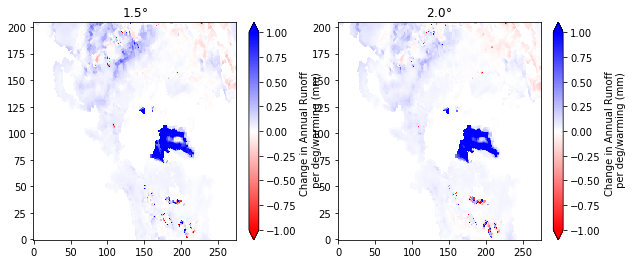

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

plt.sca(axes[0])
s_1pt5_annual_mean.plot(add_labels=False, 
                        cbar_kwargs={'label': 'Change in Annual Runoff \n per deg/warming (mm)'}, 
                       vmin=-1.0, vmax=1.0, cmap='bwr_r')
axes[0].set_title('$1.5\degree$')

plt.sca(axes[1])
s_2pt0_annual_mean.plot(add_labels=False, 
                        cbar_kwargs={'label': 'Change in Annual Runoff \n per deg/warming (mm)'}, 
                       vmin=-1.0, vmax=1.0, cmap='bwr_r')
axes[1].set_title('$2.0\degree$')

fig.savefig(os.path.join(plot_direc, 
                         'annual_runoff_mean_lwe.png'), dpi=dpi)

In [12]:
s_1pt5_mean

<xarray.DataArray (season: 4, nj: 205, ni: 275)>
dask.array<shape=(4, 205, 275), dtype=float32, chunksize=(1, 205, 275)>
Coordinates:
    xc       (nj, ni) float64 189.2 189.4 189.6 189.7 189.9 190.1 190.2 ...
    yc       (nj, ni) float64 16.53 16.78 17.02 17.27 17.51 17.76 18.0 18.25 ...
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Dimensions without coordinates: nj, ni

/u/home/gergel/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:46: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


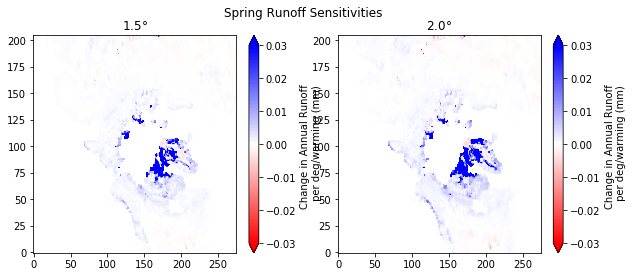

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

season = 'MAM'
vmin = -0.03
vmax = 0.03

plt.sca(axes[0])
s_1pt5_mean.sel(season=season).plot(add_labels=False, 
                        cbar_kwargs={'label': 'Change in Annual Runoff \n per deg/warming (mm)'}, 
                       vmin=vmin, vmax=vmax, cmap='bwr_r')
axes[0].set_title('$1.5\degree$')

plt.sca(axes[1])
s_2pt0_mean.sel(season=season).plot(add_labels=False, 
                        cbar_kwargs={'label': 'Change in Annual Runoff \n per deg/warming (mm)'}, 
                       vmin=vmin, vmax=vmax, cmap='bwr_r')
axes[1].set_title('$2.0\degree$')

fig.savefig(os.path.join(plot_direc, 
                         'annual_runoff_mean_lwe.png'), dpi=dpi)
plt.suptitle('Spring Runoff Sensitivities')

fig.savefig(os.path.join(plot_direc, 
                         'spring_runoff_mean_lwe.png'), dpi=dpi)

/u/home/gergel/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:46: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


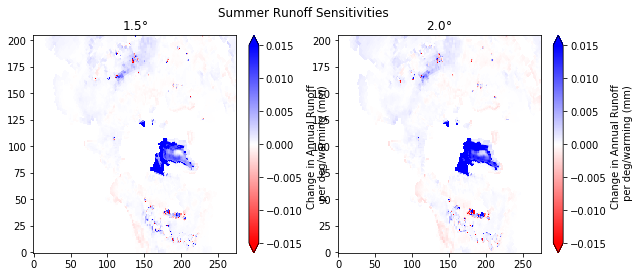

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

season = 'JJA'
vmin = 0.015
vmax = -0.015

plt.sca(axes[0])
s_1pt5_mean.sel(season=season).plot(add_labels=False, 
                        cbar_kwargs={'label': 'Change in Annual Runoff \n per deg/warming (mm)'}, 
                       vmin=vmin, vmax=vmax, cmap='bwr_r')
axes[0].set_title('$1.5\degree$')

plt.sca(axes[1])
s_2pt0_mean.sel(season=season).plot(add_labels=False, 
                        cbar_kwargs={'label': 'Change in Annual Runoff \n per deg/warming (mm)'}, 
                       vmin=vmin, vmax=vmax, cmap='bwr_r')
axes[1].set_title('$2.0\degree$')

fig.savefig(os.path.join(plot_direc, 
                         'annual_runoff_mean_lwe.png'), dpi=dpi)
plt.suptitle('Summer Runoff Sensitivities')

fig.savefig(os.path.join(plot_direc, 
                         'summer_runoff_mean_lwe.png'), dpi=dpi)

/u/home/gergel/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:46: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


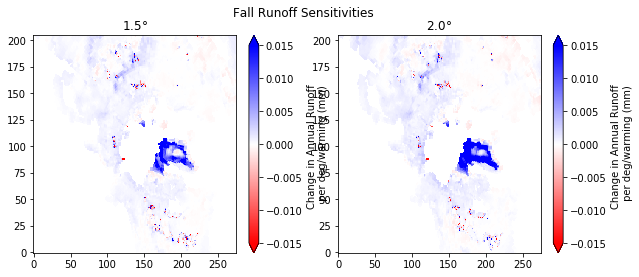

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

season = 'SON'
vmin = 0.015
vmax = -0.015

plt.sca(axes[0])
s_1pt5_mean.sel(season=season).plot(add_labels=False, 
                        cbar_kwargs={'label': 'Change in Annual Runoff \n per deg/warming (mm)'}, 
                       vmin=vmin, vmax=vmax, cmap='bwr_r')
axes[0].set_title('$1.5\degree$')

plt.sca(axes[1])
s_2pt0_mean.sel(season=season).plot(add_labels=False, 
                        cbar_kwargs={'label': 'Change in Annual Runoff \n per deg/warming (mm)'}, 
                       vmin=vmin, vmax=vmax, cmap='bwr_r')
axes[1].set_title('$2.0\degree$')

fig.savefig(os.path.join(plot_direc, 
                         'annual_runoff_mean_lwe.png'), dpi=dpi)
plt.suptitle('Fall Runoff Sensitivities')

fig.savefig(os.path.join(plot_direc, 
                         'fall_runoff_mean_lwe.png'), dpi=dpi)

/u/home/gergel/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/u/home/gergel/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:46: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/u/home/gergel/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/compatibility.py:47: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/u/home/gergel/miniconda3/envs/pangeo/lib/python3.6/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


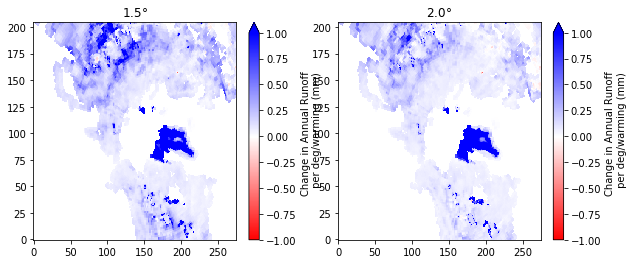

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

plt.sca(axes[0])
s_1pt5_annual_max.plot(add_labels=False, 
                        cbar_kwargs={'label': 'Change in Annual Runoff \n per deg/warming (mm)'}, 
                       vmin=-1.0, vmax=1.0, cmap='bwr_r')
axes[0].set_title('$1.5\degree$')

plt.sca(axes[1])
s_2pt0_annual_max.plot(add_labels=False, 
                        cbar_kwargs={'label': 'Change in Annual Runoff \n per deg/warming (mm)'}, 
                       vmin=-1.0, vmax=1.0, cmap='bwr_r')
axes[1].set_title('$2.0\degree$')

fig.savefig(os.path.join(plot_direc, 
                         'annual_runoff_max_lwe.png'), dpi=dpi)

In [7]:
scale = '50m'

plt.rcParams.update({'mathtext.default':  'regular' })

class Rasm(ccrs.Projection):

    def __init__(self):

        proj4_params = {'R': 6371200.0,
                        'lat_0': 90.0,
                        'lat_1': 90,
                        'lat_2': 90,
                        'lon_0': -114.0+360,
                        'proj': 'lcc',
                        'units': 'm',
                        'x_0': 9469302.950316086,
                        'y_0': 6201952.603370549}

        super(Rasm, self).__init__(proj4_params)

    @property
    def boundary(self):
        coords = ((self.x_limits[0], self.y_limits[0]),(self.x_limits[1], self.y_limits[0]),
                  (self.x_limits[1], self.y_limits[1]),(self.x_limits[0], self.y_limits[1]),
                  (self.x_limits[0], self.y_limits[0]))

        return ccrs.sgeom.Polygon(coords).exterior

    @property
    def threshold(self):
        return 100000.0

    @property
    def x_limits(self):
        return (0, 16423961.103252266)

    @property
    def y_limits(self):
        return (0, 12228062.194885937)

NameError: name 'koppen' is not defined

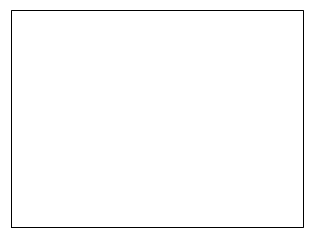

In [12]:
fig, axes = plt.subplots(1, 1, figsize=(6, 4), subplot_kw=dict(projection=Rasm()))

koppen['Band1'].where(domain.mask == 1).plot.pcolormesh('xc', 'yc', add_labels=False, 
                        cbar_kwargs={'label': 'Climate Class'}, 
                        cmap='viridis', transform=ccrs.PlateCarree())
axes.set_title('Koppen-Geiger Classification')
axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.3, linestyle='--')
axes.coastlines()
axes.set_title('Koppen-Geiger Classification')

fig.savefig(os.path.join(plot_direc, 
                         'koppen.png'), dpi=dpi)

/u/home/gergel/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:46: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


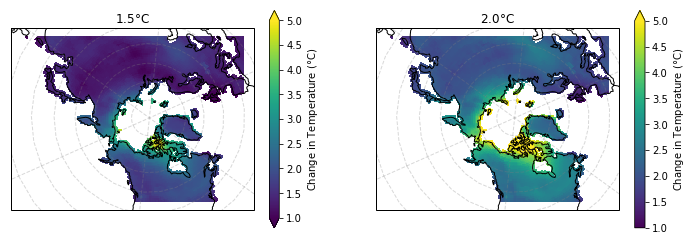

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), subplot_kw=dict(projection=Rasm()))

plt.sca(axes[0])
tbot_diff_1pt5.mean('ensemble_member').plot.pcolormesh('xc', 'yc', add_labels=False, 
                        cbar_kwargs={'label': 'Change in Temperature ($\degree$C)'}, 
                       cmap='viridis', vmin = 1, vmax = 5, transform=ccrs.PlateCarree())
axes[0].set_title('$1.5\degree$C')
axes[0].gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.3, linestyle='--')
axes[0].coastlines()

plt.sca(axes[1])
tbot_diff_2pt0.mean('ensemble_member').plot.pcolormesh('xc', 'yc', add_labels=False, 
                        cbar_kwargs={'label': 'Change in Temperature ($\degree$C)'}, 
                       cmap='viridis', vmin = 1, vmax = 5, transform=ccrs.PlateCarree())
axes[1].set_title('$2.0\degree$C')
axes[1].gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.3, linestyle='--')
axes[1].coastlines()

fig.savefig(os.path.join(plot_direc, 
                         'tbot_mean.png'), bbox_inches='tight', dpi=dpi)

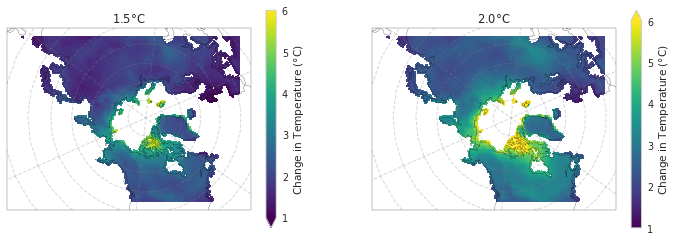

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), subplot_kw=dict(projection=Rasm()))

plt.sca(axes[0])
tbot_diff_1pt5.max('ensemble_member').plot.pcolormesh('xc', 'yc', add_labels=False, 
                        cbar_kwargs={'label': 'Change in Temperature ($\degree$C)'}, 
                       cmap='viridis', vmin=1, vmax=6, transform=ccrs.PlateCarree())
axes[0].set_title('$1.5\degree$C')
axes[0].gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.3, linestyle='--')
axes[0].coastlines()

plt.sca(axes[1])
tbot_diff_2pt0.max('ensemble_member').plot.pcolormesh('xc', 'yc', add_labels=False, 
                        cbar_kwargs={'label': 'Change in Temperature ($\degree$C)'}, 
                       cmap='viridis', vmin=1, vmax=6, transform=ccrs.PlateCarree())
axes[1].set_title('$2.0\degree$C')
axes[1].gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.3, linestyle='--')
axes[1].coastlines()

fig.savefig(os.path.join(plot_direc, 
                         'tbot_max.png'), bbox_inches='tight', dpi=dpi)

/u/home/gergel/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:46: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/u/home/gergel/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/compatibility.py:47: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/u/home/gergel/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/compatibility.py:47: RuntimeWarning: All-NaN axis encountered
  return func(*args, **kwargs)
/u/home/gergel/miniconda3/envs/pangeo/lib/python3.6/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)
/u/home/gergel/miniconda3/envs/pangeo/lib/python3.6/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN axis encountered
  ret = f(ret)


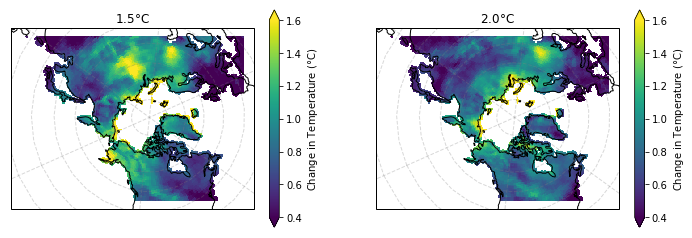

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), subplot_kw=dict(projection=Rasm()))

plt.sca(axes[0])
ens_diff_1pt5 = tbot_diff_1pt5.max('ensemble_member') - tbot_diff_1pt5.min('ensemble_member')
ens_diff_1pt5.plot.pcolormesh('xc', 'yc', add_labels=False, 
                        cbar_kwargs={'label': 'Change in Temperature ($\degree$C)'}, 
                       cmap='viridis', vmin=0.4, vmax=1.6, transform=ccrs.PlateCarree())
axes[0].set_title('$1.5\degree$C')
axes[0].gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.3, linestyle='--')
axes[0].coastlines()

plt.sca(axes[1])
ens_diff_2pt0 = tbot_diff_2pt0.max('ensemble_member') - tbot_diff_2pt0.min('ensemble_member')
ens_diff_2pt0.plot.pcolormesh('xc', 'yc', add_labels=False, 
                        cbar_kwargs={'label': 'Change in Temperature ($\degree$C)'}, 
                       cmap='viridis', vmin=0.4, vmax=1.6, transform=ccrs.PlateCarree())
axes[1].set_title('$2.0\degree$C')
axes[1].gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.3, linestyle='--')
axes[1].coastlines()

fig.savefig(os.path.join(plot_direc, 
                         'tbot_ens_range.png'), bbox_inches='tight', dpi=dpi)

group by hydroclimate classification 

In [14]:
grid = 'wr50a_ar9v4'
classes = xr.open_dataset(os.path.join('/u/home/gergel/data/parameters',
                                             'hydroclimate_masks_%s.nc' %grid))

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
colors = dict(zip(['polar', 'arid', 'cold_dry_perma', 'cold_wds_ws_perma', 'cold_wds_ws_noperma', 
                   'cold_wds_cs_perma', 'cold_wds_cs_noperma','temperate_dry','cold_dry_noperma'], 
                  
                  ["#95a5a6", "#34495e", "#2ecc71", "#8b65bd", "#5671d3", "#e81a4a", 
                   '#857739','#f07e53','#3cacbc']))

In [17]:
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.2,)
plt.rcParams.update({'mathtext.default':  'regular' })
dpi = 200

In [18]:
tbot_diff_1pt5_mean = tbot_diff_1pt5.mean('ensemble_member')
tbot_diff_2pt0_mean = tbot_diff_2pt0.mean('ensemble_member')

runoff_hist_annual_mean = runoff_hist_annual.mean('ensemble_member')
runoff_1pt5_annual_mean = runoff_1pt5_annual.mean('ensemble_member')
runoff_2pt0_annual_mean = runoff_2pt0_annual.mean('ensemble_member')

finished plotting 1pt5 for polar, sens value is 7.645750
finished plotting 1pt5 for arid, sens value is 3.758174
finished plotting 1pt5 for cold_dry_perma, sens value is 5.711467
finished plotting 1pt5 for cold_wds_ws_perma, sens value is 4.669353
finished plotting 1pt5 for cold_wds_ws_noperma, sens value is 2.143507
finished plotting 1pt5 for cold_wds_cs_perma, sens value is 4.496819
finished plotting 1pt5 for cold_wds_cs_noperma, sens value is 3.734307
finished plotting 1pt5 for temperate_dry, sens value is 4.286672
finished plotting 1pt5 for cold_dry_noperma, sens value is 4.094482
finished plotting 2pt0 for polar, sens value is 7.340437
finished plotting 2pt0 for arid, sens value is 1.580088
finished plotting 2pt0 for cold_dry_perma, sens value is 5.281380
finished plotting 2pt0 for cold_wds_ws_perma, sens value is 3.979822
finished plotting 2pt0 for cold_wds_ws_noperma, sens value is 1.705820
finished plotting 2pt0 for cold_wds_cs_perma, sens value is 4.107298
finished plotting 2p

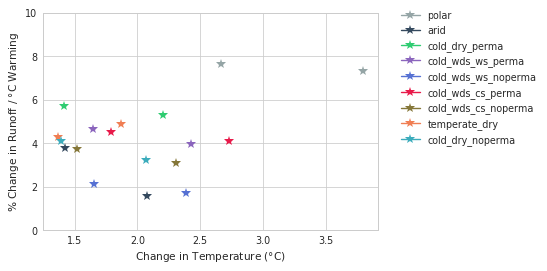

In [22]:
fig, axes = plt.subplots(1, 1, figsize=(6, 4))

temp_scenarios_annual_means = {}
temp_scenarios_annual_means['1pt5'] = runoff_1pt5_annual_mean
temp_scenarios_annual_means['2pt0'] = runoff_2pt0_annual_mean

tbot_scenarios_annual_means = {}
tbot_scenarios_annual_means['1pt5'] = tbot_diff_1pt5_mean
tbot_scenarios_annual_means['2pt0'] = tbot_diff_2pt0_mean

x_values = [1.5, 2.0]
scenarios = ['1pt5', '2pt0']
# scenarios = ['1pt5']
# hydroclimate_classes = ['polar']
hydroclimate_classes = ['polar', 'arid', 'cold_dry_perma', 'cold_wds_ws_perma', 'cold_wds_ws_noperma', 
                   'cold_wds_cs_perma', 'cold_wds_cs_noperma','temperate_dry','cold_dry_noperma']

for i, scenario in enumerate(scenarios):
    for hydroclimate_class in hydroclimate_classes:
        scen_ann_mean = temp_scenarios_annual_means[scenario]
        tbot_ann_mean = tbot_scenarios_annual_means[scenario]
        runoff_scen_hc = np.asscalar(scen_ann_mean.where(classes[hydroclimate_class] == 1, 
                                                         drop=True).mean(dim=('nj', 'ni')).values)
        runoff_scen_hist = np.asscalar(runoff_hist_annual_mean.where(classes[hydroclimate_class] == 1, 
                                                                     drop=True).mean(dim=('nj', 'ni')).values)
        x_val = np.asscalar(tbot_ann_mean.where(classes[hydroclimate_class] == 1, 
                                                         drop=True).mean(dim=('nj', 'ni')).values)
        y_val = ((((runoff_scen_hc - runoff_scen_hist) / runoff_scen_hist) * 100) / x_val)
        axes.plot(x_val, y_val, marker='*', color=colors[hydroclimate_class], 
                  label=hydroclimate_class, markersize=10)
        if i == 0: 
            axes.legend(bbox_to_anchor=(1.5, 1.05))
        print('finished plotting %s for %s, sens value is %f' %(scenario, hydroclimate_class, y_val))
plt.xlabel('Change in Temperature ($\degree$C)')
plt.ylabel('% Change in Runoff / $\degree$C Warming')
plt.ylim([0, 10])
fig.savefig(os.path.join(plot_direc, 
                         'runoff_annual_mean_hydroclimate_classes.png'), 
            bbox_inches='tight', 
            dpi=dpi)

finished plotting 1pt5 for arid, sens value is 0.057449
finished plotting 1pt5 for cold_dry_perma, sens value is 0.045998
finished plotting 1pt5 for cold_wds_ws_perma, sens value is 0.080316
finished plotting 1pt5 for cold_wds_ws_noperma, sens value is 0.090494
finished plotting 1pt5 for cold_wds_cs_perma, sens value is 0.059433
finished plotting 1pt5 for cold_wds_cs_noperma, sens value is 0.061948
finished plotting 1pt5 for temperate_dry, sens value is 0.028539
finished plotting 1pt5 for cold_dry_noperma, sens value is 0.064198
finished plotting 2pt0 for arid, sens value is 0.030733
finished plotting 2pt0 for cold_dry_perma, sens value is 0.046228
finished plotting 2pt0 for cold_wds_ws_perma, sens value is 0.036953
finished plotting 2pt0 for cold_wds_ws_noperma, sens value is 0.029356
finished plotting 2pt0 for cold_wds_cs_perma, sens value is 0.044650
finished plotting 2pt0 for cold_wds_cs_noperma, sens value is 0.037923
finished plotting 2pt0 for temperate_dry, sens value is 0.02906

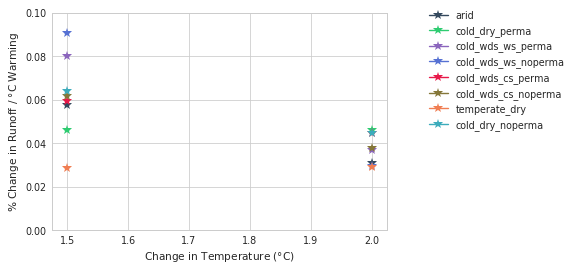

In [40]:
fig, axes = plt.subplots(1, 1, figsize=(6, 4))

temp_scenarios_annual_means = {}
temp_scenarios_annual_means['1pt5'] = s_1pt5_annual_mean
temp_scenarios_annual_means['2pt0'] = s_2pt0_annual_mean

x_values = [1.5, 2.0]
scenarios = ['1pt5', '2pt0']
# scenarios = ['1pt5']
# hydroclimate_classes = ['polar']
hydroclimate_classes = ['arid', 'cold_dry_perma', 'cold_wds_ws_perma', 'cold_wds_ws_noperma', 
                   'cold_wds_cs_perma', 'cold_wds_cs_noperma','temperate_dry','cold_dry_noperma']

for i, scenario in enumerate(scenarios):
    for hydroclimate_class in hydroclimate_classes:
        if hydroclimate_class != 'mask_land':
            scen_ann_mean = temp_scenarios_annual_means[scenario]
            y_val = np.asscalar(scen_ann_mean.where(classes[hydroclimate_class] == 1, drop=True).mean(dim=('nj', 'ni')).values)
            axes.plot(x_values[i], y_val, marker='*', color=colors[hydroclimate_class], 
                      label=hydroclimate_class, markersize=10)
            if i == 0: 
                axes.legend(bbox_to_anchor=(1.1, 1.05))
            print('finished plotting %s for %s, sens value is %f' %(scenario, hydroclimate_class, y_val))
plt.xlabel('Change in Temperature ($\degree$C)')
plt.ylabel('% Change in Runoff / $\degree$C Warming')
axes.set_ylim([0, 0.1])
fig.savefig(os.path.join(plot_direc, 
                         'runoff_annual_mean_hydroclimate_classes_no_polar.png'), dpi=dpi)